In [3]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00


In [16]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import kaleido
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
caminho_do_arquivo = '/content/drive/MyDrive/UFCG/VisualizaçãodeDados/dataset-anonimizado.csv'

# Carregando o dataset
df = pd.read_csv(caminho_do_arquivo, encoding='latin', sep=";")

# Visualizando as primeiras linhas do dataset
df.head()

,Data,Grupos,Gênero,Qual a sua idade?,Qual a sua cidade natal? (Responder no formato: CIDADE - UF),Hora Início Av1,Hora Fim Av1,Nota Av1,Quantos semestres faltam para você se formar?,"Selecione o seu Perfil de Conectividade neste semestre, dentre as opções a seguir:",Fale um pouco sobre suas expectativas com a disciplina.,Você já teve experiência de participação em projetos de Pesquisa e Desenvolvimento?,"Caso tenha respondido ""SIM"" na pergunta anterior, responda: Você desempenhou alguma tarefa envolvendo Visualização de Dados?",Marque as linguagens de programação que você já teve algum contato prático:
0,"quinta, 1 Fev 2024, 21:34",T1_Grupo_B,M,23-24,Parelhas - RN,16:10,16:56,NaN,0 (este é o último),Totalmente Conectado,Espero aprender as boas práticas de visualizaç...,Sim,Sim,C\nC++\nJava\nJavaScript\nPython\nR\nTypeScript
1,"quinta, 1 Fev 2024, 10:57",T1_Grupo_B,M,23-24,Campina Grande-PB,16:10,16:58,NaN,0 (este é o último),Totalmente Conectado,"Aprender novas formas de visualizar dados, com...",Sim,Não,Java\nJavaScript\nPython
2,"domingo, 4 Fev 2024, 12:41",T1_Grupo_B,M,21-22,Campina Grande - PB,16:10,16:45,NaN,0 (este é o último),Totalmente Conectado,Aprimorar meus conhecimentos e habilidades em ...,Não,-,Java\nJavaScript\nPython\nTypeScript
3,"terça, 6 Fev 2024, 13:30",T1_Grupo_D,M,23-24,Campina Grande-PB,16:10,16:41,NaN,4,Totalmente Conectado,Espero aprender a criar formas de visualizar d...,Sim,Sim,Java\nPython
4,"quinta, 1 Fev 2024, 09:47",T1_Grupo_C,F,19-20,Maceió - AL,16:10,16:50,NaN,5,Não Conectado,"Totalmente Conectado, tenho a espectativa de p...",Sim,Sim,Java\nJavaScript\nPython


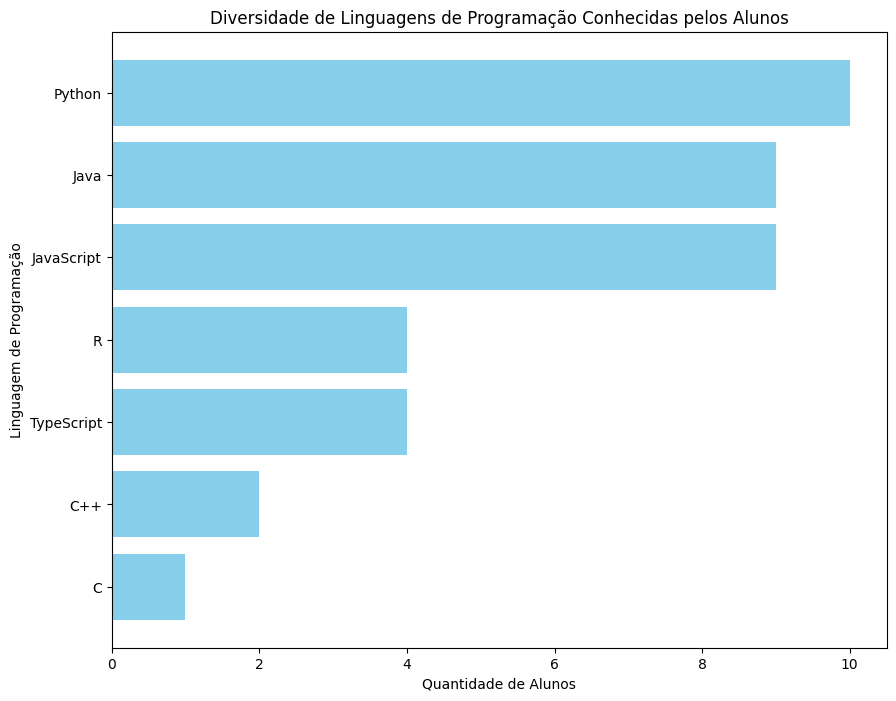

In [7]:
# Processar as linguagens de programação
linguagens_list = [linguagem for sublist in df['Marque as linguagens de programação que você já teve algum contato prático:'].str.split('\n') for linguagem in sublist if linguagem]
linguagens_count = Counter(linguagens_list)
df_linguagens = pd.DataFrame(linguagens_count.items(), columns=['Linguagem', 'Quantidade']).sort_values(by='Quantidade', ascending=False)

# Visualização para o Projeto 1
plt.figure(figsize=(10, 8))
plt.barh(df_linguagens['Linguagem'], df_linguagens['Quantidade'], color='skyblue')
plt.xlabel('Quantidade de Alunos')
plt.ylabel('Linguagem de Programação')
plt.title('Diversidade de Linguagens de Programação Conhecidas pelos Alunos')
plt.gca().invert_yaxis()
plt.show()

# Analisando o gráfico
## A apartir da visualização acima, podemos constatar que a linguagem predominante entre os alunos da turma de Visualizações de Dados é Python, já a linguagem menos conhecida por eles é C. O que faz muito sentido, tendo em vista que alunos que optam por essa disciplina possuem um perfil mais de analista de dados e linguagens como Python e R são as mais utilizadas para realizarem tarefas nessa área.

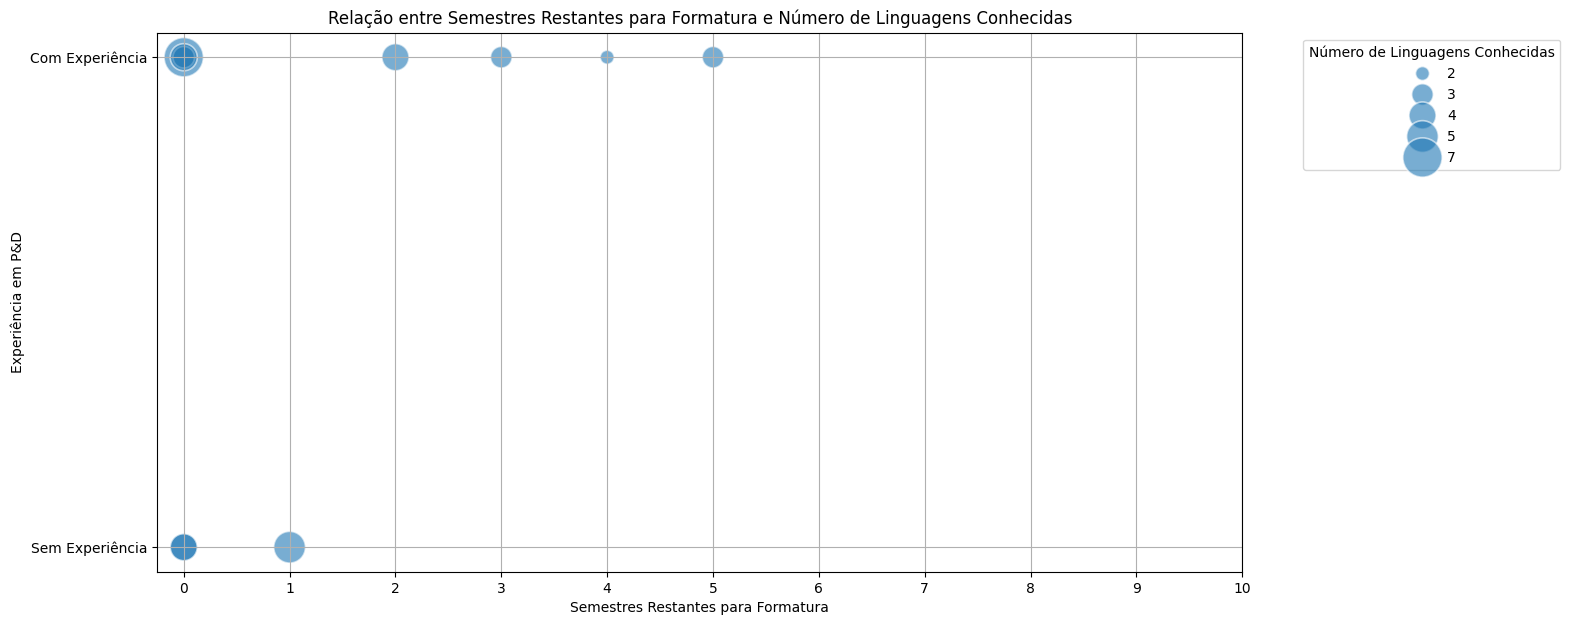

In [8]:

# Contar o número de linguagens conhecidas por cada aluno
df['Número de Linguagens'] = df['Marque as linguagens de programação que você já teve algum contato prático:'].str.count('\n') + 1

# Ajuste para a coluna de semestres restantes
df['Semestres Restantes Para Formar'] = df['Quantos semestres faltam para você se formar?'].apply(lambda x: 0 if x == '0 (este é o último)' else int(x))

# Mapear a experiência em P&D para descrições mais claras
df['Experiência em P&D Desc'] = df['Você já teve experiência de participação em projetos de Pesquisa e Desenvolvimento?'].map({'Sim': 'Com Experiência', 'Não': 'Sem Experiência'})

plt.figure(figsize=(14, 7))
scatter = sns.scatterplot(data=df, x='Semestres Restantes Para Formar', y='Experiência em P&D Desc',
                          size='Número de Linguagens', sizes=(100, 800), alpha=0.6, legend='full')

# Títulos e Legendas
plt.title("Relação entre Semestres Restantes para Formatura e Número de Linguagens Conhecidas")
plt.xlabel("Semestres Restantes para Formatura")
plt.ylabel("Experiência em P&D")
plt.xticks(range(0, 11))  # Garantir que os semestres vão de 0 a 10
plt.grid(True)

# Ajustar a legenda para indicar que representa o número de linguagens conhecidas
plt.legend(title='Número de Linguagens Conhecidas', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


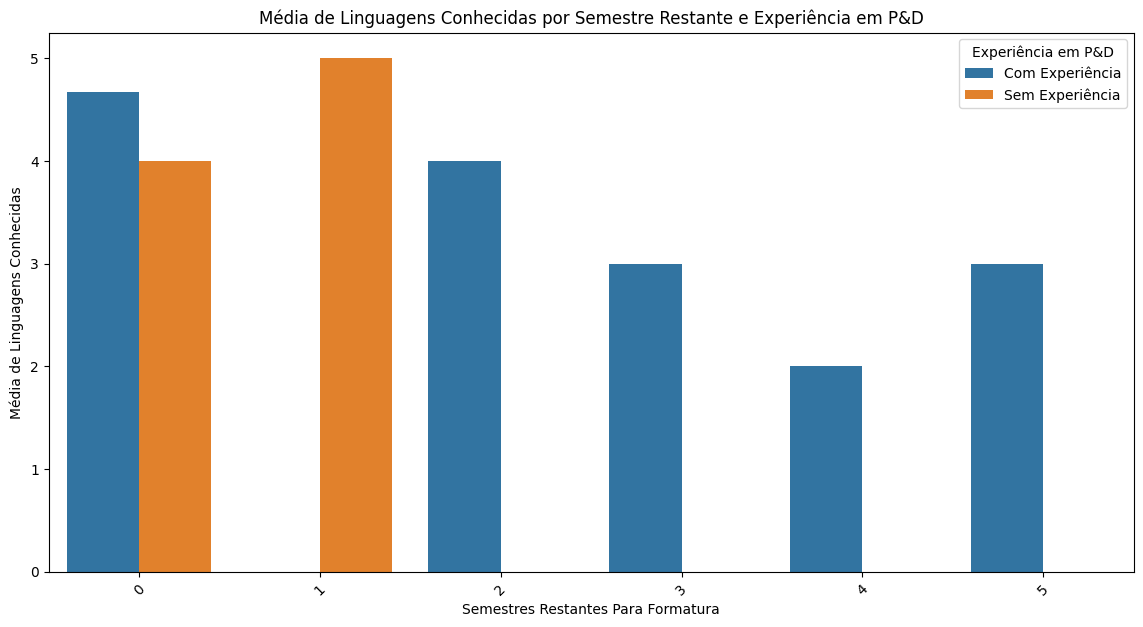

In [9]:
# Calculando a média do número de linguagens conhecidas para cada grupo
mean_languages = df.groupby(['Semestres Restantes Para Formar', 'Experiência em P&D Desc'])['Número de Linguagens'].mean().reset_index()

# Visualização para o Projeto 2
plt.figure(figsize=(14, 7))
sns.barplot(x="Semestres Restantes Para Formar", y="Número de Linguagens", hue="Experiência em P&D Desc", data=mean_languages)

plt.title("Média de Linguagens Conhecidas por Semestre Restante e Experiência em P&D")
plt.xlabel("Semestres Restantes Para Formatura")
plt.ylabel("Média de Linguagens Conhecidas")
plt.legend(title="Experiência em P&D", loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Analisando os Gráficos
## As visulaizações anterioes nos mostram que conforme o aluno vai seguindo no curso ele vai tendo contato com mais liguagens de porgramação e isso também pode estar relacionado com sua experiência em projetos P&D.

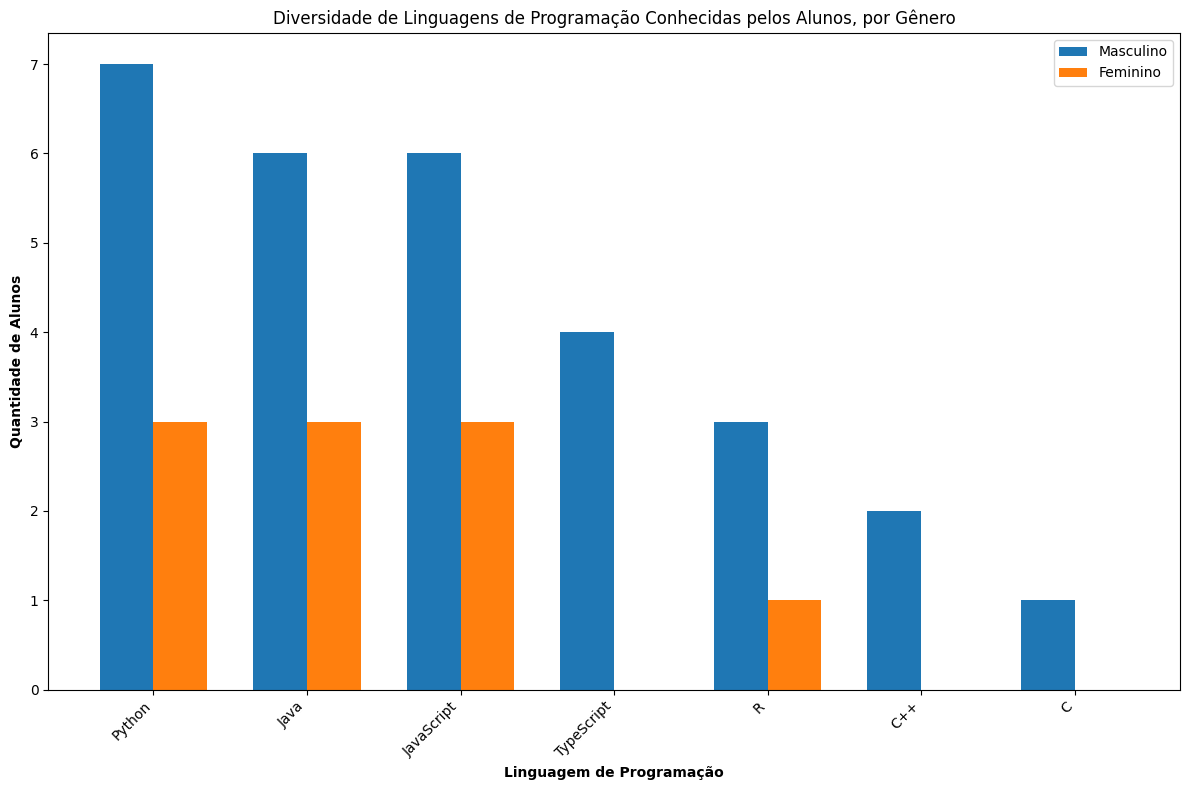

In [10]:
# Preparando as linguagens e contabilizando por gênero
df['Linguagens'] = df['Marque as linguagens de programação que você já teve algum contato prático:'].str.split('\n')
contador_masculino = Counter()
contador_feminino = Counter()

for index, row in df.iterrows():
    if row['Gênero'] == 'M':
        contador_masculino.update(row['Linguagens'])
    elif row['Gênero'] == 'F':
        contador_feminino.update(row['Linguagens'])

# Transformando contadores em DataFrames
df_linguagens_m = pd.DataFrame(contador_masculino.items(), columns=['Linguagem', 'Quantidade']).sort_values(by='Quantidade', ascending=False)
df_linguagens_f = pd.DataFrame(contador_feminino.items(), columns=['Linguagem', 'Quantidade']).sort_values(by='Quantidade', ascending=False)

# Merge dos DataFrames para ter uma coluna para cada gênero
df_linguagens_agrupadas = pd.merge(df_linguagens_m, df_linguagens_f, on='Linguagem', how='outer', suffixes=('_M', '_F')).fillna(0)
df_linguagens_agrupadas.columns = ['Linguagem', 'Quantidade_M', 'Quantidade_F']

# Ordenando os dados pela soma das quantidades
df_linguagens_agrupadas['Total'] = df_linguagens_agrupadas['Quantidade_M'] + df_linguagens_agrupadas['Quantidade_F']
df_linguagens_agrupadas = df_linguagens_agrupadas.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Visualização com barras agrupadas
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = df_linguagens_agrupadas.index
r1 = index
r2 = [x + bar_width for x in r1]

bars1 = ax.bar(r1, df_linguagens_agrupadas['Quantidade_M'], width=bar_width, label='Masculino')
bars2 = ax.bar(r2, df_linguagens_agrupadas['Quantidade_F'], width=bar_width, label='Feminino')

ax.set_xlabel('Linguagem de Programação', fontweight='bold')
ax.set_ylabel('Quantidade de Alunos', fontweight='bold')
ax.set_title('Diversidade de Linguagens de Programação Conhecidas pelos Alunos, por Gênero')
ax.set_xticks([r + bar_width/2 for r in range(len(df_linguagens_agrupadas['Linguagem']))])
ax.set_xticklabels(df_linguagens_agrupadas['Linguagem'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

# Analisando o gráfico
Popularidade das Linguagens: Python e Java parecem ser as linguagens mais conhecidas entre os alunos, com Python sendo a mais popular para ambos os gêneros.

Diferença de Gênero: Existe uma diferença visível no conhecimento de linguagens de programação entre os gêneros. Por exemplo, mais alunos do gênero masculino parecem conhecer Java, enquanto a diferença é menos acentuada, mas ainda presente, em Python.

Linguagens Menos Conhecidas: Linguagens como C++ e C têm um número menor de alunos que as conhecem, indicando que elas podem ser menos populares ou talvez mais avançadas/ específicas.

Representação Feminina: Para todas as linguagens de programação listadas, o número de estudantes do gênero feminino que as conhecem é menor do que os do gênero masculino. Isso pode sugerir questões de representatividade e diversidade dentro do grupo estudado.

Tendências e Insights Adicionais: Ao comparar o conhecimento de linguagens de programação por gênero, podemos investigar se existem tendências que indicam uma especialização ou preferência por certas linguagens que possam estar correlacionadas com outros fatores, como o currículo do curso ou as oportunidades de carreira percebidas.

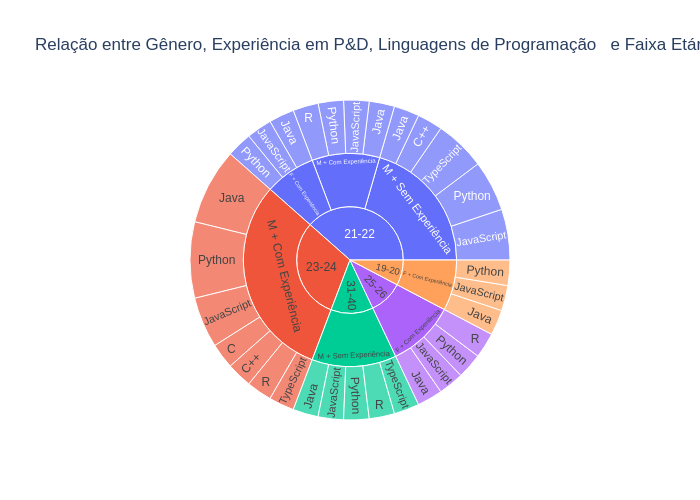

In [14]:
pio.renderers.default = "png"

# Criando uma coluna combinada de Gênero + Experiência em P&D
df['Gênero_Experiência'] = df['Gênero'] + ' + ' + df['Experiência em P&D Desc']

# Expandindo das listas de linguagens em linhas separadas
df_exploded = df.explode('Linguagens')

# Criando o gráfico Sunburst
fig = px.sunburst(df_exploded, path=['Qual a sua idade?','Gênero_Experiência', 'Linguagens', ],
                  title="Relação entre Gênero, Experiência em P&D, Linguagens de Programação e Faixa Etária")

fig.show()

# Analisando o Gráfico
Distribuição por Gênero e Experiência em P&D: O gráfico central mostra a divisão de estudantes por gênero (Masculino ou Feminino) e se eles têm ou não experiência em P&D. Isso nos permite ver a proporção de estudantes em cada categoria.

Linguagens de Programação: As seções intermediárias dividem esses grupos pelas linguagens de programação conhecidas. Podemos ver quais linguagens são mais populares entre os grupos e se há alguma linguagem que é mais conhecida por um grupo específico, como uma linguagem sendo mais dominada por estudantes com experiência em P&D.

Faixas Etárias: O anel externo representa as faixas etárias dos estudantes. Isso pode nos mostrar se há uma tendência de estudantes de certas idades terem mais experiência com certas linguagens ou terem mais experiência em P&D.

Relações e Padrões: Podemos procurar por padrões, como se estudantes mais jovens ou mais velhos tendem a saber linguagens diferentes ou se a experiência em P&D está correlacionada com a idade.

Representatividade: Além disso, a representatividade de cada segmento (gênero + experiência em P&D, linguagem, idade) é indicada pelo tamanho de cada seção do gráfico, permitindo uma comparação visual rápida da distribuição.

In [18]:
# Definindo a semente aleatória para reprodutibilidade
np.random.seed(42)

# Preenchendo e arredondando os valores na mesma linha
df['Nota Av1'] = np.round(np.random.uniform(0, 10, size=len(df)), 2)

# Verificando os primeiros valores para confirmar
print(df['Nota Av1'].head())

0    3.75
1    9.51
2    7.32
3    5.99
4    1.56
Name: Nota Av1, dtype: float64


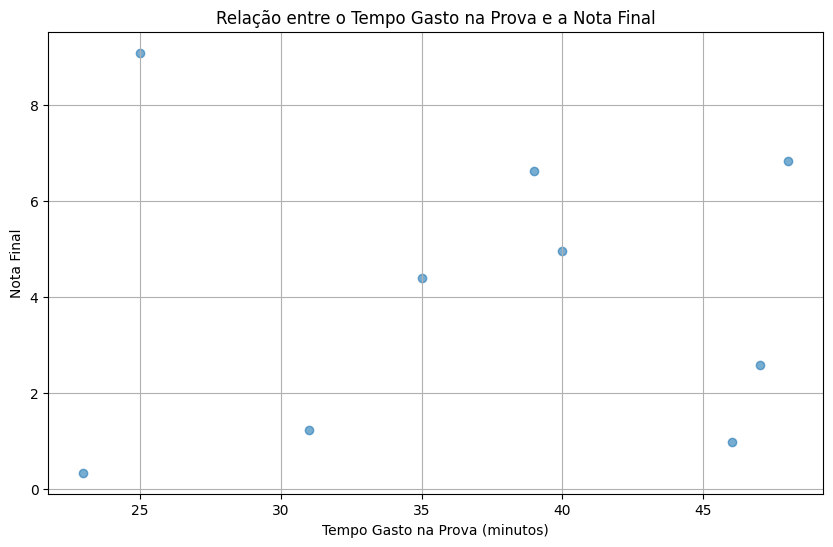

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Tratando os valores inválidos antes de converter para datetime
df['Hora Início Av1'] = pd.to_datetime(df['Hora Início Av1'], errors='coerce')
df['Hora Fim Av1'] = pd.to_datetime(df['Hora Fim Av1'], errors='coerce')

df['Tempo Gasto (min)'] = (df['Hora Fim Av1'] - df['Hora Início Av1']).dt.total_seconds() / 60

df = df.dropna(subset=['Tempo Gasto (min)', 'Nota Av1'])

# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Tempo Gasto (min)'], df['Nota Av1'], alpha=0.6)

plt.title('Relação entre o Tempo Gasto na Prova e a Nota Final')
plt.xlabel('Tempo Gasto na Prova (minutos)')
plt.ylabel('Nota Final')
plt.grid(True)
plt.show()

# Analisando o gráfico
Distribuição: Os pontos parecem estar relativamente dispersos, o que sugere que não há uma relação linear clara entre o tempo gasto na prova e a nota final. Em outras palavras, não é possível afirmar que gastar mais tempo na prova resulta consistentemente em uma nota mais alta, ou vice-versa.

Ausência de Padrão Óbvio: Não parece haver um padrão óbvio ou uma tendência que indique que mais tempo leva a notas mais altas ou mais baixas. Os pontos não formam uma linha ascendente ou descendente distinta.

Outliers: Há alguns pontos que se destacam do resto, como o ponto com uma nota acima de 8 e tempo gasto próximo de 35 minutos. Estes podem ser considerados outliers e podem merecer uma investigação mais detalhada para entender por que se desviam da norma.

Variabilidade: Existe uma certa variabilidade nas notas que parece independente do tempo gasto na prova. Por exemplo, há estudantes que gastaram aproximadamente a mesma quantidade de tempo, mas obtiveram notas muito diferentes.